In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
print('Training images:{}'.format(X_train.shape))
print('Testing images:{}'.format(X_test.shape))

Training images:(50000, 32, 32, 3)
Testing images:(10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


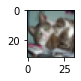

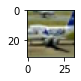

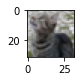

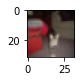

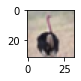

In [5]:
for i in range(331,336):
  plt.subplot(120+ 1 + i)
  img =X_train[i]
  plt.imshow(img)
  plt.show()


In [6]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test=X_test/255
n_classes = 10

print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 535s 1s/step - loss: 1.5914 - accuracy: 0.4160 - val_loss: 1.2203 - val_accuracy: 0.5747
Epoch 2/20
391/391 [==============================] - 534s 1s/step - loss: 1.1109 - accuracy: 0.6060 - val_loss: 0.8893 - val_accuracy: 0.6926
Epoch 3/20
391/391 [==============================] - 533s 1s/step - loss: 0.9236 - accuracy: 0.6792 - val_loss: 0.8144 - val_accuracy: 0.7166
Epoch 4/20
391/391 [==============================] - 532s 1s/step - loss: 0.8036 - accuracy: 0.7208 - val_loss: 0.7716 - val_accuracy: 0.7352
Epoch 5/20
391/391 [==============================] - 532s 1s/step - loss: 0.7319 - accuracy: 0.7459 - val_loss: 0.7274 - val_accuracy: 0.7464
Epoch 6/20
391/391 [==============================] - 527s 1s/step - loss: 0.6639 - accuracy: 0.7689 - val_loss: 0.6904 - val_accuracy: 0.7576
Epoch 7/20
391/391 [==============================] - 527s 1s/step - loss: 0.6088 - accuracy: 0.7877 - val_loss: 0.6642 - val_accuracy: 0.7708

In [8]:
classes =range(0,10)
names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes, names))
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)
predictions = model.predict(batch, verbose = 1)


1/1 [==============================] - 0s 271ms/step


In [9]:
print (predictions)

[[6.94212722e-05 1.02881686e-05 1.66220479e-02 4.17999830e-03
  2.96803355e-01 1.22251958e-02 1.07456732e-03 6.68932080e-01
  2.24899068e-05 6.05127898e-05]
 [4.18269519e-05 1.25246341e-04 2.38082856e-02 3.53121758e-01
  1.72192324e-02 5.13434350e-01 7.29225427e-02 1.85913611e-02
  2.00359078e-04 5.35006984e-04]
 [3.71035712e-04 1.57168062e-04 1.92553811e-02 2.82100476e-02
  1.76478014e-03 6.35172129e-02 8.85423064e-01 8.50710378e-04
  7.50877080e-05 3.75520380e-04]
 [1.52966717e-09 1.01751697e-10 2.78821091e-08 9.99872446e-01
  1.29819455e-05 1.79427570e-06 1.12696260e-04 2.86999366e-08
  3.84647070e-09 7.30431848e-09]
 [1.06880449e-09 9.99870062e-01 5.86022624e-15 3.29517352e-15
  4.23284168e-17 2.58733784e-16 1.98800022e-16 3.03481232e-14
  8.26363866e-09 1.29867622e-04]
 [1.55281552e-10 9.99952197e-01 2.99996226e-16 1.49080069e-14
  3.75178396e-18 2.36500493e-16 2.94157342e-12 4.45562615e-18
  1.44503801e-07 4.76617788e-05]
 [4.79202978e-02 1.33077858e-03 2.15642876e-03 6.43612742e

In [10]:
for image in predictions:
    print(np.sum(image))

0.99999994
0.99999994
1.0000001
0.99999994
0.99999994
1.0
1.0
1.0000001
0.99999994


In [11]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 5 6 3 1 1 3 6 8]


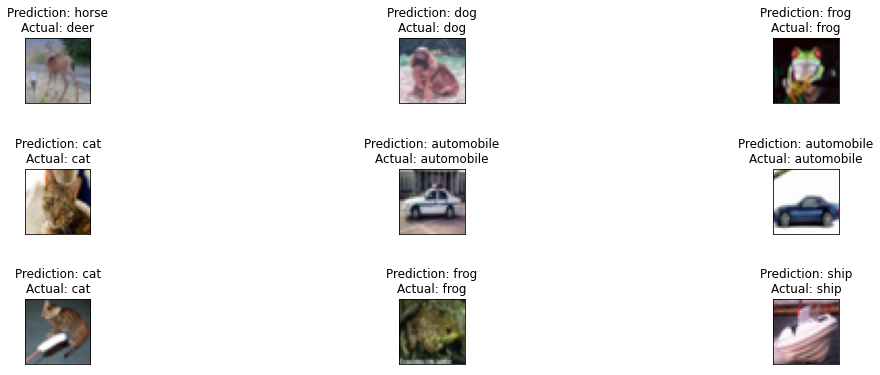

In [12]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()
for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    # plot the image
    axs[i].imshow(img)
# show the plot
plt.show()